# kNN - k Nearest Neighbor

Imagine you meet a group of people, they are all very young, stylish and sportive. They talk about there friend Ben, who isn't with them. So, what is your imagination of Ben? Right, you imagine him as being yong, stylish and sportive as well.

The principle behind **nearest neighbor classification** consists in finding a predefined number $k$ of training samples closest in distance to a new sample, which has to be classified.
The label of the new sample will be defined from these neighbors.
k-nearest neighbor classifiers have a fixed user defined constant for the number of neighbors which have to be determined.

The distance can, in general, be any metric measure: standard Euclidean distance is the most common choice.

The k-NN algorithm is among the simplest of all machine learning algorithms, but despite its simplicity, it has been quite successful in a large number of classification and regression problems, for example character recognition or image analysis.

There is no general way to define an optimal value for $k$. This value depends on the data. As a general rule we can say that increasing $k$ reduces the noise but on the other hand makes the boundaries less distinct.

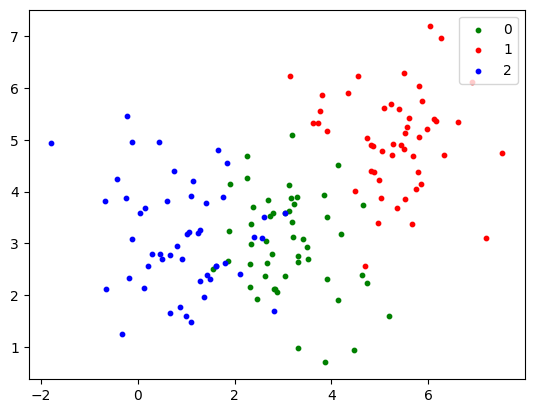

In [74]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

# this dataset can work well also with a perceptron
# centers = [[2, 3], [5, 5], [1, 8]]

# this other dataset would perform bad with a perceptron, but works well with kNN
centers = [[3, 3], [5, 5], [1, 3]]
n_classes = len(centers)
data, labels = make_blobs(n_samples=150, 
                          centers=np.array(centers),
                          random_state=1
                          )

colours = ('green', 'red', 'blue')

# visualization of the created dataset
fig, ax = plt.subplots()
for n_class in range(0, n_classes):
    ax.scatter(data[labels==n_class, 0], data[labels==n_class, 1], 
               c=colours[n_class], s=10, label=str(n_class))
ax.legend(loc='upper right')

### create and fit a nearest-neighbor classifier

In [75]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(
    data,
    labels,
    train_size=0.8,
    test_size=0.2,
    # random_state=1
)

from sklearn.neighbors import KNeighborsClassifier

# choose the model, default k is 5
knn = KNeighborsClassifier()
# train the model
knn.fit(train_data, train_labels)

predicted = knn.predict(test_data)
print("Predictions from the classifier:")
print(predicted)
print("Target values:")
print(test_labels)

Predictions from the classifier:
[2 0 2 0 2 2 0 1 2 0 0 2 1 0 0 2 1 1 0 0 1 0 0 0 0 0 2 1 1 0]
Target values:
[2 0 2 0 2 2 0 1 2 0 0 2 1 0 0 2 1 1 0 0 1 0 0 0 0 0 0 1 1 0]


### evaluate the result

In [76]:
# from sklearn.metrics import accuracy_score
# print(accuracy_score(predicted, test_labels))
from sklearn.metrics import classification_report
print(classification_report(predicted, test_labels))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      1.00      1.00         7
           2       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.98      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

